# Plotting

## Setup

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd

pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10)

## Create DataFrame from SQL Query
Install mysql-connector-python with `pip install mysql-connector-python`

In [2]:
import mysql.connector

connection = mysql.connector.connect(
    host='lahman.csw1rmup8ri6.us-east-1.rds.amazonaws.com',
    user='python',
    passwd='python',
    db='lahmansbaseballdb'
)

query = '''SELECT year(debut) year, avg(weight) weight
           FROM people
           WHERE debut is NOT NULL
           GROUP BY year
           ORDER BY year'''

df = pd.read_sql_query(query, connection, coerce_float=True, index_col="year")
df

,weight
year,
1871,157.0495
1872,166.9032
1873,157.5385
1874,159.5000
1875,164.0408
...,...
2015,210.1339
2016,207.3837
2017,206.9924


## Create Plot

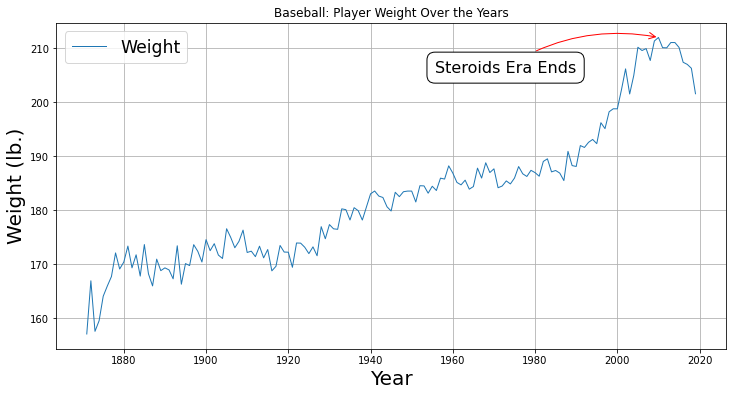

In [3]:
plot = df.plot(
    title = "Baseball: Player Weight Over the Years",
    figsize=(12, 6),
    lw = 1
)

plot.set_ylabel('Weight (lb.)', fontsize=20)
plot.set_xlabel('Year', fontsize=20)
plot.grid(True) 

plot.legend(['Weight'], loc="upper left", fontsize='xx-large')

plot.annotate(
        text = 'Steroids Era Ends', 
        xy = (2010, 212), 
        xytext = (1990, 205),
        ha = 'right', va='bottom', fontsize=16,
        bbox = dict(boxstyle = 'round, pad=0.5', fc='white', alpha=1),
        arrowprops = dict(arrowstyle='->', connectionstyle='arc3, rad=-.2', color='red')
);